# Note

The following tutorial is for the upcoming py50 v1.0.0 update. Interested parties can install the code directly from the git repository, but there may be issues that will need to be ironed out before then. This tutorial is a way for me to keep track of the functions I have implemented and to show off what I have planned.  

# Statistics Quickstart

**NOTE** This notebook is not meant to teach statistics, but only demo how to run the py50 functions. There are plenty of resources available online. I particularly found introductory [tutorials by DATAtab](https://datatab.net/tutorial/get-started) helpful. 


With the release of py50 v1.0.0, the package now includes functions for statistic calculations nad plot annotations! 

The following page will detail how to use the statistic calculations and the plotting in py50. 


In [1]:
from py50.stats import Stats, Plots
import pingouin as pg
from matplotlib import pyplot as plt

In [2]:
# Load an example dataset comparing pain threshold as a function of hair color
df = pg.read_dataset('anova')
print('List of Groups in Dataset:', df['Hair color'].unique())
working_df = df
working_df

List of Groups in Dataset: ['Light Blond' 'Dark Blond' 'Light Brunette' 'Dark Brunette']


,Subject,Hair color,Pain threshold
0,1,Light Blond,62
1,2,Light Blond,60
2,3,Light Blond,71
3,4,Light Blond,55
4,5,Light Blond,48
5,6,Dark Blond,63
6,7,Dark Blond,57
7,8,Dark Blond,52
8,9,Dark Blond,41
9,10,Dark Blond,43


In [3]:
# Initialize Stats()
stats = Stats()

# Test for normality
stats.get_normality(working_df).round(3)

,W,pval,normal
Subject,0.961,0.59,True
Pain threshold,0.971,0.80,True


In [4]:
stats.get_homoscedasticity(working_df, value_col='Pain threshold', group_col='Hair color')

,W,pval,equal_var
levene,0.392743,0.760016,True


## Visualize Data Distribution

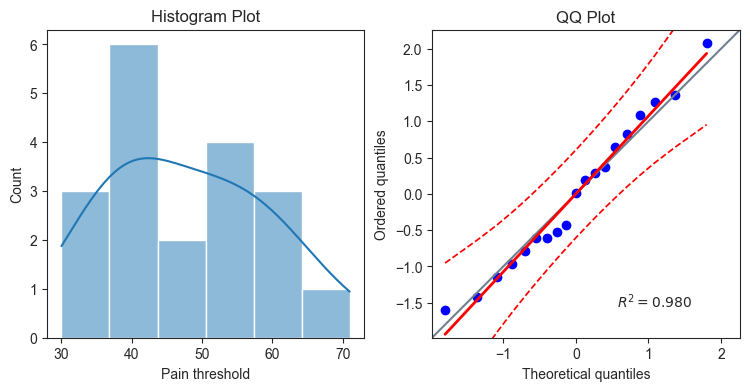

In [5]:
plot = Plots()

# create subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
plot.distribution(working_df, val_col='Pain threshold', type='histplot', ax=ax1)
plot.distribution(working_df, val_col='Pain threshold', type='qqplot', ax=ax2)

# Adding titles to subplots
ax1.set_title('Histogram Plot')
ax2.set_title('QQ Plot')

plt.show()

# Perform One-Way Anova

In [6]:
anova = stats.get_anova(working_df, value_col='Pain threshold', group_col='Hair color')
anova

,Source,ddof1,ddof2,F,p-unc,np2,significance
0,Hair color,3,15,6.791407,0.004114,0.575962,**


# Post-Hoc Tests

In [7]:
tukey = stats.get_tukey(working_df, value_col='Pain threshold', group_col='Hair color')
tukey

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges,significance
0,Dark Blond,Dark Brunette,51.2,37.4,13.8,5.168623,2.669957,0.074068,1.413596,n.s.
1,Dark Blond,Light Blond,51.2,59.2,-8.0,5.168623,-1.547801,0.435577,-0.810661,n.s.
2,Dark Blond,Light Brunette,51.2,42.5,8.7,5.482153,1.586968,0.414728,0.982361,n.s.
3,Dark Brunette,Light Blond,37.4,59.2,-21.8,5.168623,-4.217758,0.003708,-2.336811,**
4,Dark Brunette,Light Brunette,37.4,42.5,-5.1,5.482153,-0.930291,0.789321,-0.626769,n.s.
5,Light Blond,Light Brunette,59.2,42.5,16.7,5.482153,3.046249,0.036647,2.015280,*


# Plot results

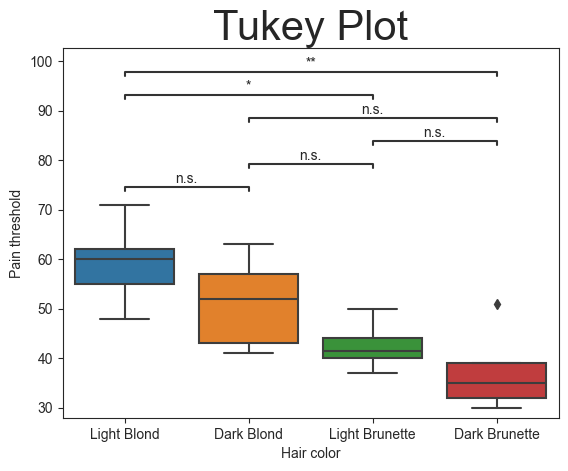

In [8]:
plot.box_plot(working_df, test='tukey', value_col='Pain threshold', group_col='Hair color', title='Tukey Plot', title_fontsize=30)

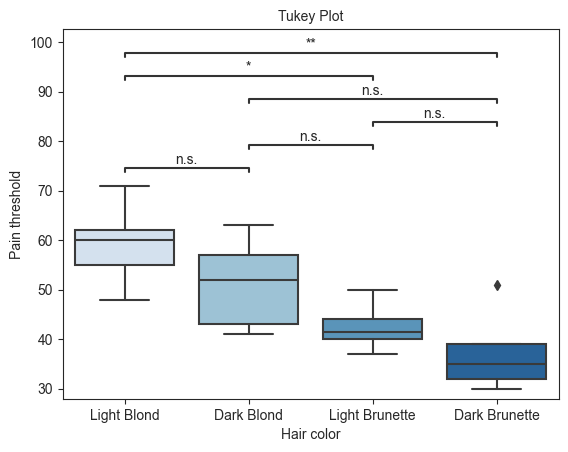

In [9]:
# Modify color and title size
plot.box_plot(working_df, test='tukey', value_col='Pain threshold', group_col='Hair color', title='Tukey Plot', title_size=20, palette='Blues')

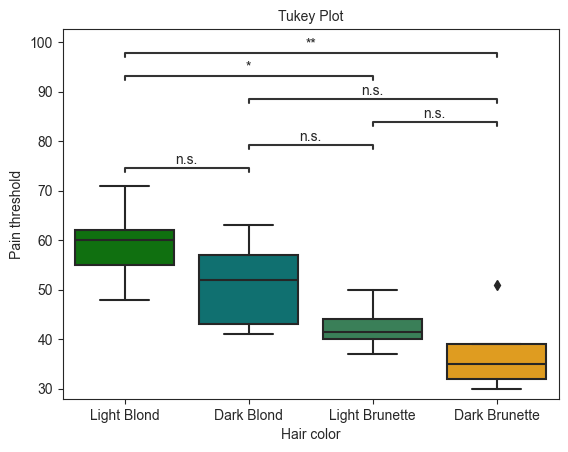

In [10]:
# Specify color and rotate
palette = ['green', 'teal', 'seagreen', 'orange']
plot.box_plot(working_df, test='tukey', value_col='Pain threshold', group_col='Hair color', title='Tukey Plot', palette=palette)

odict_keys(['x', 'y', 'hue', 'data', 'order', 'hue_order', 'orient', 'color', 'palette', 'saturation', 'width', 'dodge', 'fliersize', 'linewidth', 'whis', 'ax', 'kwargs'])
{}


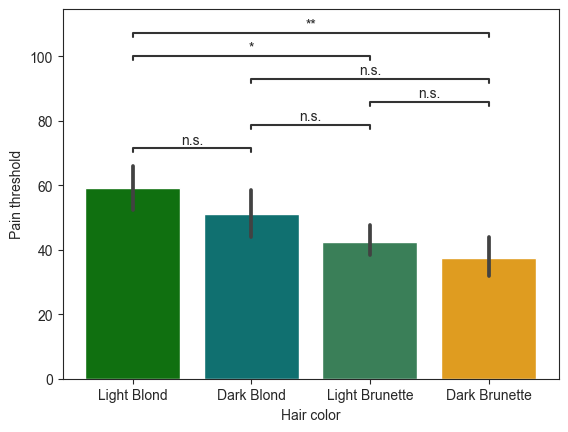

In [11]:
plot.bar_plot(working_df, test='tukey', value_col='Pain threshold', group_col='Hair color', title='Tukey Plot', palette=palette)

Scikit posthocs

**this works with tukey. test this will wilcoxon**

In [12]:
# Replace all string values with a new value
matrix_df = stats.get_p_matrix(tukey, test='tukey', group_col1='A', group_col2='B')
matrix_df

,Dark Blond,Dark Brunette,Light Blond,Light Brunette
Dark Blond,1.000000,0.074068,0.435577,0.414728
Dark Brunette,0.074068,1.000000,0.003708,0.789321
Light Blond,0.435577,0.003708,1.000000,0.036647
Light Brunette,0.414728,0.789321,0.036647,1.000000


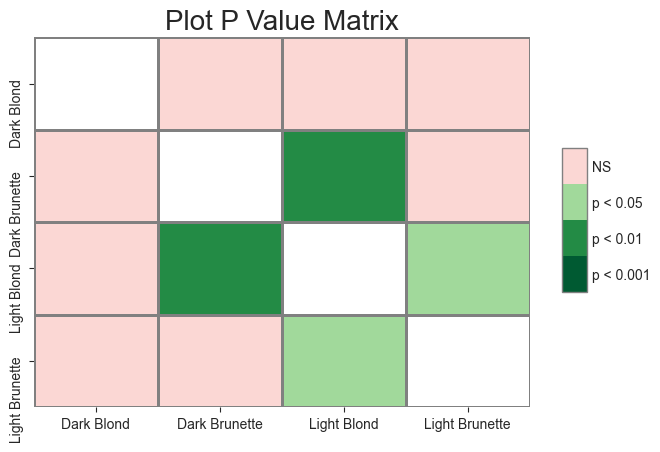

In [13]:
matrix_plot = plot.p_matrix(matrix_df, title='Plot P Value Matrix', title_fontsize=20, linewidth=1, linecolor='0.5')